In [125]:
import arima_model_master as arm
import data_getter as data_con
import importlib
import pandas as pd

importlib.reload(arm)

targets = ['MedianIncome', 'MedianHousePrice', 'AverageRate','AveragePoints','NewBuildings','NewUnits']
target = 'MedianIncome'
age_range = '25-44'
target_fips = '34003'



In [38]:
all_df = data_con.run_queries()
master_table = data_con.join_tables(all_df)

5607
5607
5607
20727


In [ ]:
assert 1 == 2 # Don't run this one if we don't need to (90 minute run time)
prediction_dataframes = []
age_ranges = master_table.AgeGroup.unique().tolist()
age_ranges = [_ for _ in age_ranges if str(_) != 'nan']
all_fips = master_table.FIPS.unique().tolist()
total = len(all_fips) * len(age_ranges)

cntr = 0
for i, age_range in enumerate(age_ranges):
    for ii, target_fips in enumerate(all_fips):
        params = [target_fips, age_range]
        target = 'MedianIncome'
        try:
            graph_ready, export_ready = arm.dispatcher(master_table, target, params)
        except Exception as E:
            print(f'Failure: {E}, params: {params}')
            cntr += 1
            continue
        export_ready['AgeGroup'] = age_range
        prediction_dataframes.append(export_ready)
        cntr += 1
        print(f'{cntr} of {total} completed')

In [126]:
prediction_dataframes = []
all_fips = master_table.FIPS.unique().tolist()
total = len(all_fips)

cntr = 0
for i, target_fips in enumerate(all_fips):
    params = [target_fips]
    target = 'MedianHousePrice'
    try:
        graph_ready, export_ready = arm.dispatcher(master_table, target, params)
    except Exception as E:
        print(f'Failure: {E}, params: {params}')
        cntr += 1
        continue
    prediction_dataframes.append(export_ready)
    cntr += 1
    print(f'{cntr} of {total} completed')

Column: MedianHousePrice | ADF Statistic: -1.998192220197724 | P-Value: 0.28736630973657734
Column: diff_12 | ADF Statistic: -1.82431009665806 | P-Value: 0.3684609324554672
local variable 'best_col' referenced before assignment
Failure: local variable 'ready_for_undiff' referenced before assignment, params: ['34001']
Column: MedianHousePrice | ADF Statistic: -1.6533758487201946 | P-Value: 0.45528041945728775
Column: diff_12 | ADF Statistic: -2.1182578070160276 | P-Value: 0.23723670120221196
(267, 7)
ARIMA(2, 1, 1) RMSE=2084.772
ARIMA(2, 1, 2) RMSE=1722.186
Best ARIMA(2, 1, 2) RMSE=1722.186
Run Completed. Dataframes Exported: "graph_ready", "export_ready"
2 of 21 completed
Column: MedianHousePrice | ADF Statistic: -1.8996049626659124 | P-Value: 0.3322469715685884
Column: diff_12 | ADF Statistic: -2.1503335998554998 | P-Value: 0.22476241899271598
(267, 7)
ARIMA(2, 1, 1) RMSE=1241.429
ARIMA(2, 1, 2) RMSE=958.287
Best ARIMA(2, 1, 2) RMSE=958.287
Run Completed. Dataframes Exported: "graph_r

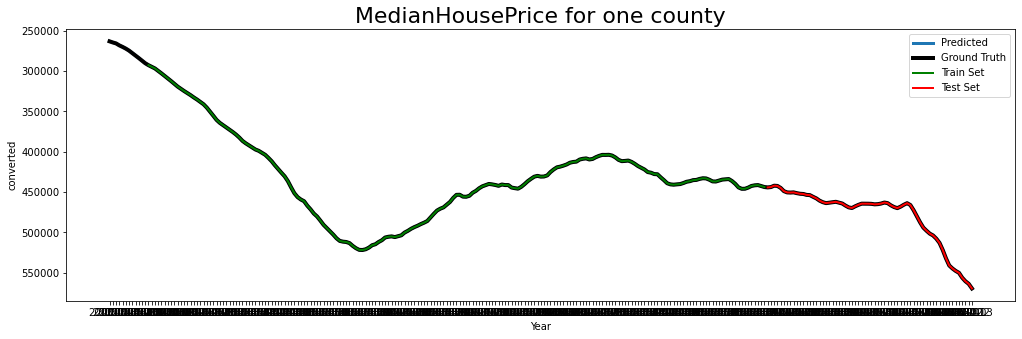

In [127]:
target = 'MedianHousePrice'
arm.graph_final_results(graph_ready, target)

In [117]:
export_ready

,Year,FIPS,Month,MedianHousePrice,diff_12,train_and_predicted
0,2000-01,34003,Jan,266953.0,NaN,266953.0
1,2000-02,34003,Feb,268039.0,NaN,268039.0
2,2000-03,34003,Mar,269220.0,NaN,269220.0
3,2000-04,34003,Apr,271467.0,NaN,271467.0
4,2000-05,34003,May,273734.0,NaN,273734.0
...,...,...,...,...,...,...
262,2021-11,34003,Nov,609509.0,64375.0,609509.0
263,2021-12,34003,Dec,613837.0,61656.0,613837.0
264,2022-01,34003,Jan,618151.0,59146.0,618151.0
265,2022-02,34003,Feb,622493.0,57352.0,622493.0


In [128]:

main_df = pd.DataFrame()

for df in prediction_dataframes:
    main_df = pd.concat([main_df,df])
    
main_df

,Year,FIPS,Month,MedianHousePrice,diff_12,train_and_predicted
0,2000-01,34003,Jan,266953.0,NaN,266953.0
1,2000-02,34003,Feb,268039.0,NaN,268039.0
2,2000-03,34003,Mar,269220.0,NaN,269220.0
3,2000-04,34003,Apr,271467.0,NaN,271467.0
4,2000-05,34003,May,273734.0,NaN,273734.0
...,...,...,...,...,...,...
262,2021-11,34035,Nov,550062.0,62623.0,550062.0
263,2021-12,34035,Dec,556133.0,62099.0,556133.0
264,2022-01,34035,Jan,560556.0,62597.0,560556.0
265,2022-02,34035,Feb,563728.0,62213.0,563728.0


In [80]:
main_df.tail(50)

,Year,FIPS,MedianIncome,AgeGroup,train_and_predicted
13,2018,34037,56123.0,under-25,56123.0
14,2019,34037,28208.0,under-25,28208.0
15,2020,NaN,NaN,under-25,30037.863845
16,2021,NaN,NaN,under-25,32255.709451
17,2022,NaN,NaN,under-25,34322.87025
18,2023,NaN,NaN,under-25,36444.885281
19,2024,NaN,NaN,under-25,None
20,2025,NaN,NaN,under-25,None
0,2005,34039,28855.0,under-25,28855.0
1,2006,34039,31986.0,under-25,31986.0


In [129]:
main_df.to_csv("PredictedHousePrices.csv", index = False)

In [119]:
starter = main_df.shape[0]
print(starter * .15)

311.7
